In [35]:
import pandas as pd
import pylab 
import scipy.stats as stats
import numpy as np
from statsmodels.stats import weightstats as stests

df = pd.read_csv("Gandum.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.describe()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
std,144.481833,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
min,1.000000,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
25%,125.750000,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,250.500000,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
75%,375.250000,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612,2.000000
max,500.000000,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000


In [ ]:
print("Skewness: ")
df.skew()

Skewness: 


id             0.000000
Daerah         0.238144
SumbuUtama     0.761529
SumbuKecil    -0.010828
Keunikan      -1.623472
AreaBulatan    0.257560
Diameter       0.002725
KadarAir       0.493661
Keliling       0.733627
Bulatan       -3.599237
Ransum        -0.658188
Kelas         -0.008024
dtype: float64

In [ ]:
print("Variance: ")
df.var()

Variance: 


id             2.087500e+04
Daerah         9.729761e+05
SumbuUtama     3.342544e+02
SumbuKecil     1.657365e+01
Keunikan       1.338528e-03
AreaBulatan    1.023529e+06
Diameter       6.491311e+01
KadarAir       8.905149e-03
Keliling       1.393932e+03
Bulatan        3.807194e-03
Ransum         6.238350e-02
Kelas          2.504970e-01
dtype: float64

In [ ]:
print("Kurtosis: ")
df.kurt()

Kurtosis: 


id             -1.200000
Daerah         -0.434631
SumbuUtama      4.330534
SumbuKecil      0.475568
Keunikan        2.917256
AreaBulatan    -0.409685
Diameter       -0.466455
KadarAir       -0.740326
Keliling        2.272685
Bulatan        29.975096
Ransum         -0.428656
Kelas          -2.007984
dtype: float64

In [ ]:
print("Modus: ")
print("Beberapa data memiliki 500 modus karena setiap datanya unik")
df.mode()

Modus: 
Beberapa data memiliki 500 modus karena setiap datanya unik


,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,3992.0,74.133114,39.906517,0.719916,3802.0,71.293564,0.735849,197.015,0.174590,1.440796,2.0
1,2,4881.0,74.364021,41.436419,0.725553,4913.0,78.833256,0.824405,200.587,0.261297,1.453137,NaN
2,3,5642.0,74.691881,42.871879,0.731211,NaN,84.756224,NaN,202.456,0.299298,1.465950,NaN
3,4,6083.0,76.293164,43.284979,0.738639,NaN,88.006342,NaN,207.325,0.589146,1.483456,NaN
4,5,NaN,76.789043,44.119355,0.749282,NaN,NaN,NaN,207.697,0.603807,1.510000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,NaN,152.068440,63.322854,0.913724,NaN,NaN,NaN,375.651,0.872417,2.461017,NaN
496,497,NaN,152.113491,63.762307,0.913760,NaN,NaN,NaN,390.125,0.874243,2.461510,NaN
497,498,NaN,153.583387,64.012769,0.913891,NaN,NaN,NaN,434.235,0.874743,2.463297,NaN
498,499,NaN,227.105462,65.738475,0.913909,NaN,NaN,NaN,448.305,0.891706,2.463546,NaN


In [ ]:
print("Interquartile Range (IQR):")
val_list = df["Daerah"].values.tolist()
iqr = stats.iqr(val_list)
print("Daerah\t\t: ", iqr)
val_list = df["SumbuUtama"].values.tolist()
iqr = stats.iqr(val_list)
print("Sumbu Utama\t: ", iqr)
val_list = df["SumbuKecil"].values.tolist()
iqr = stats.iqr(val_list)
print("Sumbu Kecil\t: ", iqr)
val_list = df["Keunikan"].values.tolist()
iqr = stats.iqr(val_list)
print("Keunikan\t: ", iqr)
val_list = df["AreaBulatan"].values.tolist()
iqr = stats.iqr(val_list)
print("Area Bulatan\t: ", iqr)
val_list = df["Diameter"].values.tolist()
iqr = stats.iqr(val_list)
print("Diameter\t: ", iqr)
val_list = df["KadarAir"].values.tolist()
iqr = stats.iqr(val_list)
print("Kadar Air\t: ", iqr)
val_list = df["Keliling"].values.tolist()
iqr = stats.iqr(val_list)
print("Keliling\t: ", iqr)
val_list = df["Bulatan"].values.tolist()
iqr = stats.iqr(val_list)
print("Bulatan\t\t: ", iqr)
val_list = df["Ransum"].values.tolist()
iqr = stats.iqr(val_list)
print("Ransum\t\t: ", iqr)
val_list = df["Kelas"].values.tolist()
iqr = stats.iqr(val_list)
print("Kelas\t\t: ", iqr)

Interquartile Range (IQR):
Daerah		:  1452.75
Sumbu Utama	:  24.93069385000001
Sumbu Kecil	:  5.131581650000001
Keunikan	:  0.04390216424999993
Area Bulatan	:  1484.0
Diameter	:  11.903290020000014
Kadar Air	:  0.15400088725000005
Keliling	:  50.17950000000002
Bulatan		:  0.06437024175000006
Ransum		:  0.3976734275
Kelas		:  1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C69AA3C8>]],
      dtype=object)

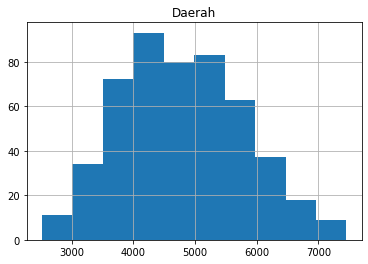

In [ ]:
#Mengetahui distribusi normal dapat dengan membandingkan bentuk histogram dengan normal probability curve
df.hist(column="Daerah")

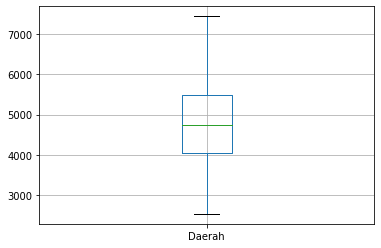

In [ ]:
df.boxplot(column="Daerah")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


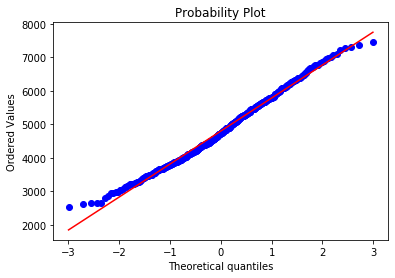

Kesimpulan: Berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Daerah"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C71E6288>]],
      dtype=object)

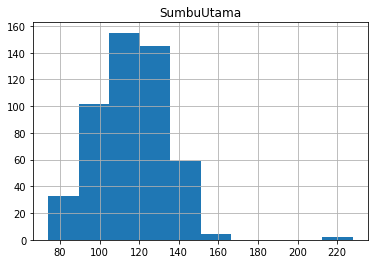

In [ ]:
df.hist(column="SumbuUtama")

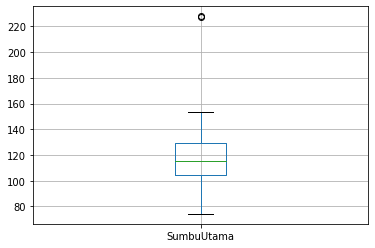

In [ ]:
df.boxplot(column="SumbuUtama")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


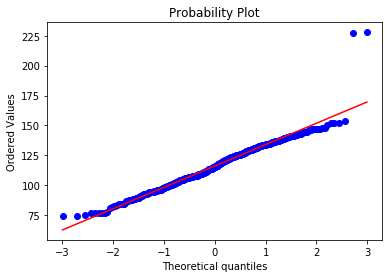

Kesimpulan: Berdistribusi normal, dengan outlier yang signifikan


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["SumbuUtama"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal, dengan outlier yang signifikan")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C76B7D88>]],
      dtype=object)

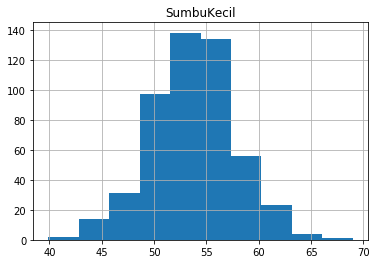

In [ ]:
df.hist(column="SumbuKecil")

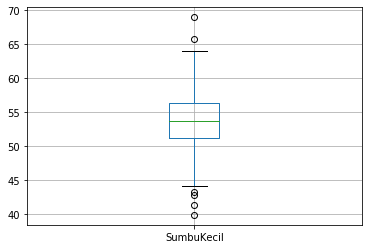

In [ ]:
df.boxplot(column="SumbuKecil")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


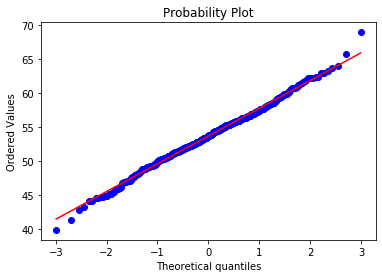

Kesimpulan: Berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["SumbuKecil"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C793BA48>]],
      dtype=object)

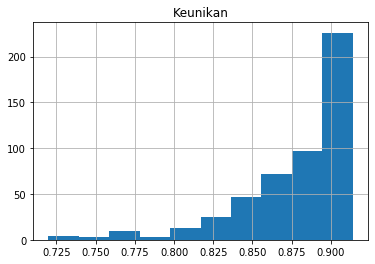

In [ ]:
df.hist(column="Keunikan")

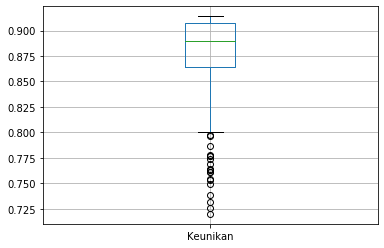

In [ ]:
df.boxplot(column="Keunikan")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


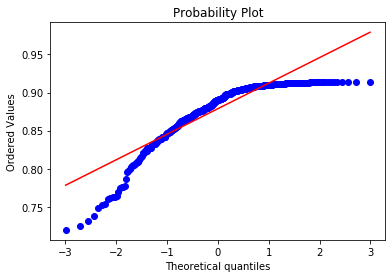

Kesimpulan: Tidak berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Keunikan"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Tidak berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7828488>]],
      dtype=object)

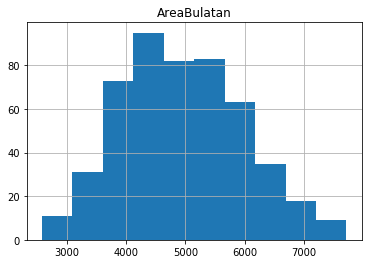

In [ ]:
df.hist(column="AreaBulatan")

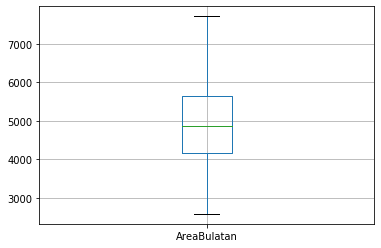

In [ ]:
df.boxplot(column="AreaBulatan")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


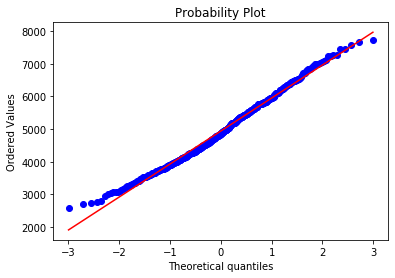

Kesimpulan: Berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["AreaBulatan"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7A998C8>]],
      dtype=object)

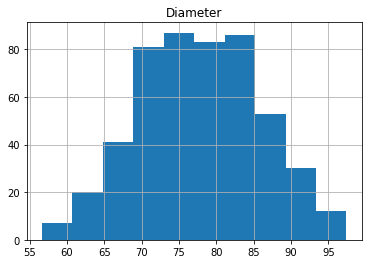

In [ ]:
df.hist(column="Diameter")

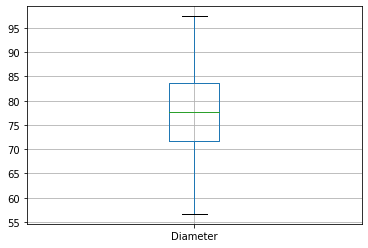

In [ ]:
df.boxplot(column="Diameter")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


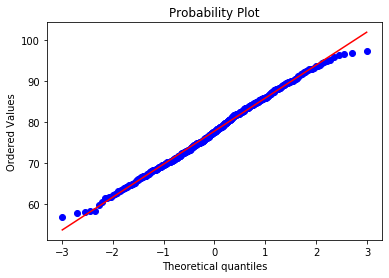

Kesimpulan: Berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Diameter"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7BFE7C8>]],
      dtype=object)

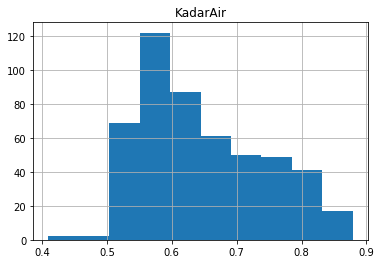

In [ ]:
df.hist(column="KadarAir")

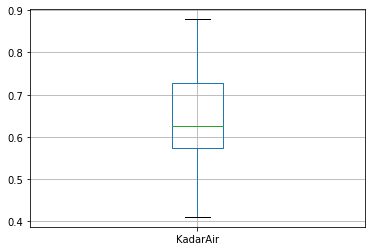

In [ ]:
df.boxplot(column="KadarAir")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


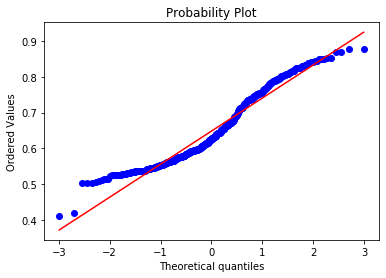

Kesimpulan: Tidak berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["KadarAir"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Tidak berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7DE9848>]],
      dtype=object)

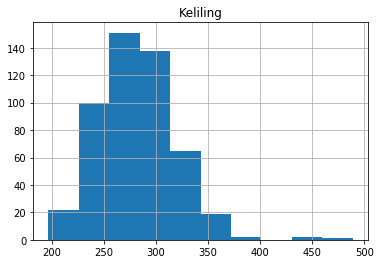

In [ ]:
df.hist(column="Keliling")

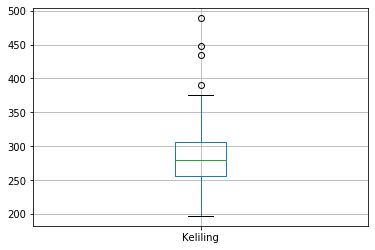

In [ ]:
df.boxplot(column="Keliling")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


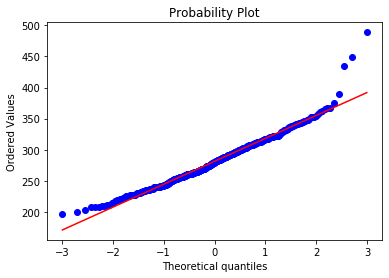

Kesimpulan: Berdistribusi normal, dengan outlier signifikan


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Keliling"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal, dengan outlier signifikan")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7D71B08>]],
      dtype=object)

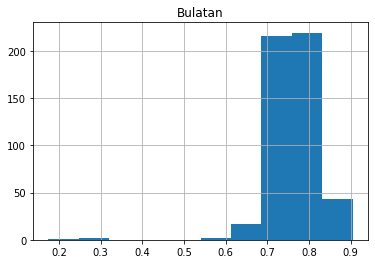

In [ ]:
df.hist(column="Bulatan")

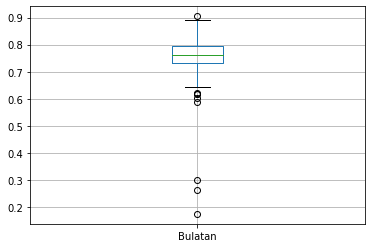

In [ ]:
df.boxplot(column="Bulatan")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


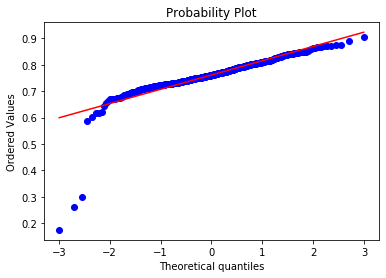

Kesimpulan: Berdistribusi normal, dengan outlier signifikan


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Bulatan"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Berdistribusi normal, dengan outlier signifikan")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7ED2548>]],
      dtype=object)

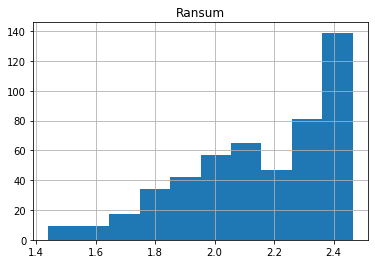

In [ ]:
df.hist(column="Ransum")

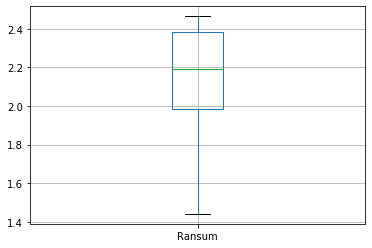

In [ ]:
df.boxplot(column="Ransum")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


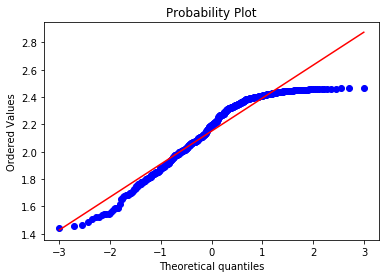

Kesimpulan: Tidak berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Ransum"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Tidak berdistribusi normal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271C7FECAC8>]],
      dtype=object)

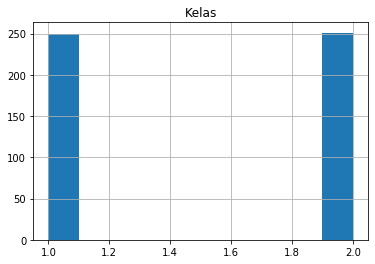

In [ ]:
df.hist(column="Kelas")

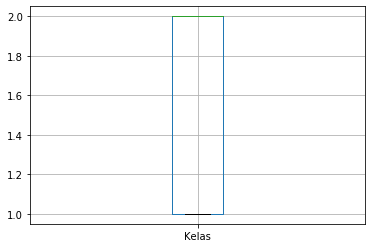

In [ ]:
df.boxplot(column="Kelas")

Pengujian distribusi normal dengan normality test Quartile-Quartile plot: 


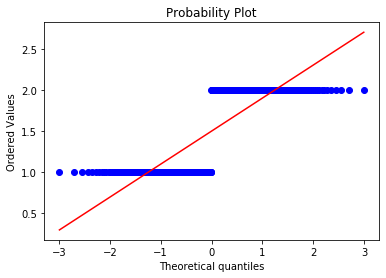

Kesimpulan: Tidak berdistribusi normal


In [ ]:
print("Pengujian distribusi normal dengan normality test Quartile-Quartile plot: ")
stats.probplot(df["Kelas"], dist="norm", plot=pylab)
pylab.show()
print("Kesimpulan: Tidak berdistribusi normal")

In [ ]:
#Korelasi
#Target adalah kolom "Kelas", yang memiliki nilai 1 atau 2
print("Correlation")

Correlation


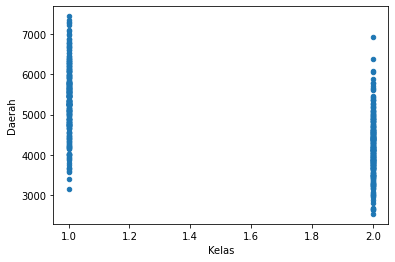

In [6]:
#Kelas-Daerah
df.plot.scatter( x = 'Kelas', y = 'Daerah')

In [ ]:
print("Korelasi negatif kuat (0.6-0.79)")
df["Kelas"].corr(df["Daerah"])

Korelasi negatif kuat (0.6-0.79)


-0.6027466517416654

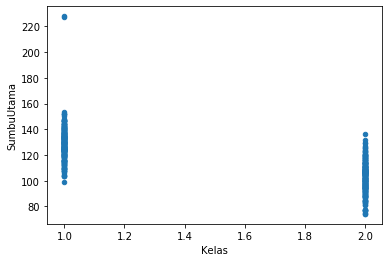

In [ ]:
#Kelas-SumbuUtama
df.plot.scatter("Kelas", "SumbuUtama")

In [ ]:
print("Korelasi negatif kuat (0.6-0.79)")
df["Kelas"].corr(df["SumbuUtama"])

Korelasi negatif kuat (0.6-0.79)


-0.7130906104204592

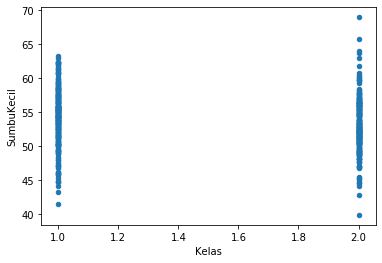

In [ ]:
#Kelas-SumbuKecil
df.plot.scatter("Kelas", "SumbuKecil")

In [ ]:
print("Korelasi negatif sangat lemah (0.0-0.19)")
df["Kelas"].corr(df["SumbuKecil"])

Korelasi negatif sangat lemah (0.0-0.19)


-0.15297517335535024

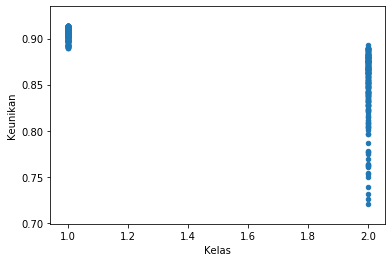

In [ ]:
#Kelas-Keunikan
df.plot.scatter("Kelas", "Keunikan")

In [ ]:
print("Korelasi negatif kuat (0.6-0.79)")
df["Kelas"].corr(df["Keunikan"])

Korelasi negatif kuat (0.6-0.79)


-0.7304563686511927

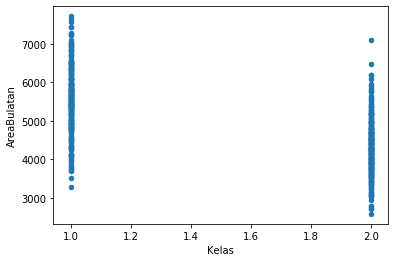

In [ ]:
#Kelas-AreaBulatan
df.plot.scatter("Kelas", "AreaBulatan")

In [ ]:
print("Korelasi negatif kuat (0.6-0.79)")
df["Kelas"].corr(df["AreaBulatan"])

Korelasi negatif kuat (0.6-0.79)


-0.6073125434153747

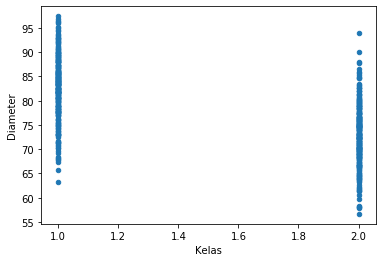

In [ ]:
#Kelas-Diameter
df.plot.scatter("Kelas", "Diameter")

In [ ]:
print("Korelasi negatif kuat (0.6-0.79)")
df["Kelas"].corr(df["Diameter"])

Korelasi negatif kuat (0.6-0.79)


-0.6025356896618811

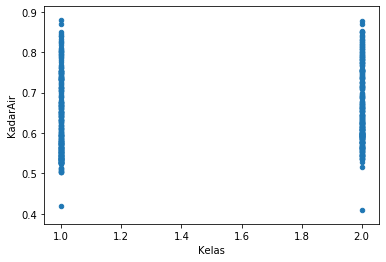

In [ ]:
#Kelas-KadarAir
df.plot.scatter("Kelas", "KadarAir")

In [ ]:
print("Korelasi positif sangat lemah (0.0-0.19)")
df["Kelas"].corr(df["KadarAir"])

Korelasi positif sangat lemah (0.0-0.19)


0.13434422605727644

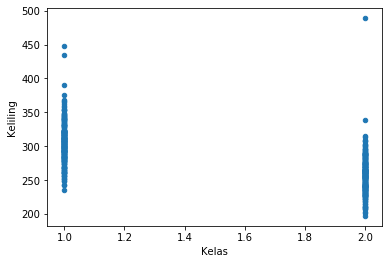

In [ ]:
#Kelas-Keliling
df.plot.scatter("Kelas", "Keliling")

In [ ]:
print("Korelasi negatif kuat (0.6-0.79)")
df["Kelas"].corr(df["Keliling"])

Korelasi negatif kuat (0.6-0.79)


-0.6348607454756852

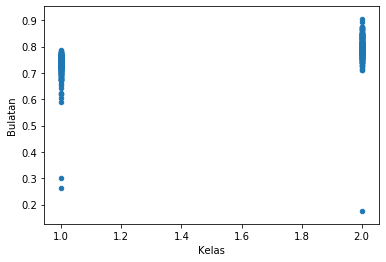

In [ ]:
#Kelas-Bulatan
df.plot.scatter("Kelas", "Bulatan")

In [ ]:
print("Korelasi positif sedang (0.4-0.59)")
df["Kelas"].corr(df["Bulatan"])

Korelasi positif sedang (0.4-0.59)


0.5450045317240073

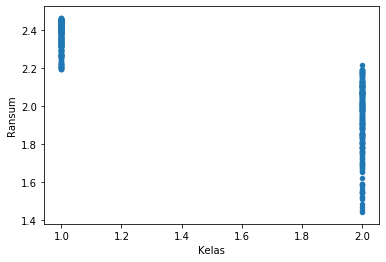

In [ ]:
#Kelas-Ransum
df.plot.scatter("Kelas", "Ransum")

In [ ]:
print("Korelasi negatif sangat kuat (0.8-1.0)")
df["Kelas"].corr(df["Ransum"])

Korelasi negatif sangat kuat (0.8-1.0)


-0.8399038681287486

In [ ]:
print("Tes Hipotesis 1 Sampel")
print("4.a: Nilai rata-rata Daerah di atas 4700?")
print("h0: rata-rata = 4700")
print("h1: rata-rata > 4700")
print("alpha = 0.05")
val_list = df["Daerah"].values.tolist()
tset, pval = stats.ttest_1samp(val_list, 4700)
print("Nilai P: ", pval)
if pval < 0.10:    # tes yang diperlukan one-tailed, sementara fungsi menghitung two-ended, sehingga Z daerah kritis perlu 2x lipat
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata diatas 4700")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata 4700")

Tes Hipotesis 1 Sampel
4.a: Nilai rata-rata Daerah di atas 4700?
h0: rata-rata = 4700
h1: rata-rata > 4700
alpha = 0.05
Nilai P:  0.022138370895226352
P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata diatas 4700


In [ ]:
print("4.b: Nilai Rata-rata Sumbu Utama tidak sama dengan 116?")
print("h0: rata-rata = 116")
print("h1: rata-rata =/= 116")
print("alpha = 0.05")
val_list = df["SumbuUtama"].values.tolist()
tset, pval = stats.ttest_1samp(val_list, 116)
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata bukan 116")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata 116")

4.b: Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
h0: rata-rata = 116
h1: rata-rata =/= 116
alpha = 0.05
Nilai P:  0.955963699941099
P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata 116


In [ ]:
print("4c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?")
print("h0: rata-rata = 50")
print("h1: rata-rata =/= 50")
print("alpha = 0.05")
val_list = df["SumbuKecil"].head(20).values.tolist()
tset, pval = stats.ttest_1samp(val_list, 50)
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata bukan 50")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata 50")

4c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
h0: rata-rata = 50
h1: rata-rata =/= 50
alpha = 0.05
Nilai P:  3.3020185644245e-06
P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata bukan 50


In [55]:
# 5.a
df_length = int(len(df)/2)
sample1 = df[df_length:]["AreaBulatan"]
sample2 = df[:df_length]["AreaBulatan"]
ttest,pval = stats.ttest_ind(sample1, sample2)
print("Mean Sample 1 : ", np.mean(sample1));
print("Mean Sample 2 : ", np.mean(sample2));
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata kedua bagian tidak sama")

Mean Sample 1 :  4324.292
Mean Sample 2 :  5549.804
Nilai P:  1.6612692497332565e-51
P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama


In [ ]:
#5.b
df_length = int(len(df)/2)
sample1 = df[df_length:]["AreaBulatan"]
sample2 = df[:df_length]["AreaBulatan"]
ttest,pval = stats.ttest_ind(sample1, sample2)
print("Mean Sample 1 : ", np.mean(sample1));
print("Mean Sample 2 : ", np.mean(sample2));
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata kedua bagian tidak sama")

In [56]:
#5.c
sample1 = df[:20]["Bulatan"];
sample2 = df[-20:]["Bulatan"];
ttest,pval = stats.ttest_ind(sample1, sample2)
print("Mean Sample 1 : ", np.mean(sample1));
print("Mean Sample 2 : ", np.mean(sample2));
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata kedua bagian tidak sama")

Mean Sample 1 :  0.7375353552499999
Mean Sample 2 :  0.767322437
Nilai P:  0.0016919037522060854
P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama


In [69]:
#5.d
data = df[df.Ransum > 2]["Ransum"]
data_length = int(len(data)/2)
sample1 = data[df_length:]
sample2 = data[:df_length];
ttest,pval = stats.ttest_ind(sample1, sample2)
print("Mean Sample 1 : ", np.mean(sample1));
print("Mean Sample 2 : ", np.mean(sample2));
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata kedua bagian tidak sama")

Mean Sample 1 :  2.219082973191257
Mean Sample 2 :  2.3311777958021986
Nilai P:  1.4031059970915394e-14
P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama


In [72]:
#5.e
sample1 = df[df_length:]["Diameter"]
sample2 = df[:df_length]["Diameter"];
ttest,pval = stats.ttest_ind(sample1, sample2)
print("Mean Sample 1 : ", np.mean(sample1));
print("Mean Sample 2 : ", np.mean(sample2));
print("Nilai P: ", pval)
if pval < 0.05:
   print("P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama")
else:
  print("P lebih besar dari alpha, Hipotesis null diterima, sehingga rata-rata kedua bagian tidak sama")

Mean Sample 1 :  75.32263039333336
Mean Sample 2 :  82.04935406087915
Nilai P:  7.433299663457453e-21
P lebih kecil dari alpha, Hipotesis null tidak diterima, sehingga rata-rata kedua bagian tidak sama


In [ ]:
[]